In [1]:
import sys
sys.path.append('/Users/Sarthak/desktop/fall19/sdcmlab/Car Interface Weeks 2-3/')

import controller
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(149)

ci = controller.Car_Interface()

ci.set_gear(ci.FORWARD)

def apply_alternating_controls(ci, num, time_per):

    commands = []

    '''
    commands should be a list of tuples (cmd_type, amt) where
    cmd_type is either 'accelerate' or 'brake' and amt is a
    random number between 0 and 1 that denotes how much the
    corresponding pedal was depressed.
    
    In total there should be num commands and each should
    be executed for time_per seconds.  The car interface log
    will be used later for accessing the data, so make sure
    to actually execute the commands on the vehicle.
    (see controller.py)
    '''
    
    for i in np.arange(num):
        pedal_decider = np.random.randint(2)
        if pedal_decider == 0:
            pedal = ci.ACCELERATOR
            cmd_type = "accelerate"
        else:
            pedal = ci.BRAKE
            cmd_type = "brake"
        amt = np.random.random_sample()
        commands.append((cmd_type, amt))
        ci.apply_control_for_time(pedal, amt, time_per)
        
        

    return commands


N = 20
TIME_PER = 50
commands = apply_alternating_controls(ci, num = N, time_per = TIME_PER)

for i in range(10):
    print(commands[i][0], f"{commands[i][1] * 100:.2f}%")

brake 16.13%
brake 86.46%
accelerate 95.12%
accelerate 86.10%
accelerate 95.16%
accelerate 60.02%
brake 28.08%
brake 90.20%
accelerate 64.60%
accelerate 19.43%


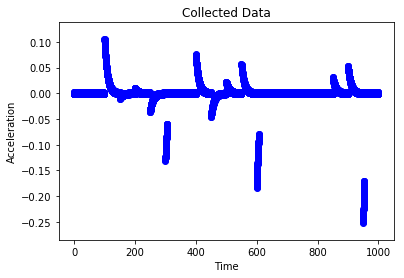

Actual Coefficients:
Acceleration: 0
Velocity: 0.0
Accelerator Weight: 0.1
Brake Weight: -0.25
___________________________________________


In [30]:
vel_log = ci.log["velocity"]
acc_log = ci.log["acceleration"]
time_log = ci.log["time"]

NUM_READINGS = len(time_log)
NUM_READINGS_PER = int(NUM_READINGS / N)

filt_times = []
filt_inps = []
filt_outs = []

all_times = []
all_inps = []
all_outs = []

for i in range(NUM_READINGS):
    cmd = commands[int(i / NUM_READINGS_PER)]
    vel = vel_log[i]
    acc = acc_log[i]
    t = time_log[i]

    if (cmd[0] == 'accelerate'):
        '''
        inp = ? should be a list of length 3 corresponding
        to the three input variable in the linear equation
        for determining acceleration
        '''
        inp = [cmd[1], 0, vel]
    elif(cmd[0] == 'brake'):
        '''
        inp = ? remember to order input variables exactly
        as done in the previous statement
        '''
        inp = [0, cmd[1], vel]

    all_inps.append(inp)
    all_outs.append(acc)
    all_times.append(t)
    
    if (abs(acc) > 0.005):
        filt_inps.append(inp)
        filt_outs.append(acc)
        filt_times.append(t)
        

    '''
    At first you can leave this code section blank.
    Once you run Linear Regression on the basic inputs
    and outputs you will notice the regression struggles to
    accurately model data.  Here you will populate the filtered
    lists (filt_inps, filt_outs, filt_times) similar to how
    the all lists are populate above, but censoring out certain
    (input, output) data points that are undesirable.
    '''


    
    
    



plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.show()

print(f"Actual Coefficients:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it.  The variables
should attributes of the car interface object
that correspond to those in the linear
equation presented in class.
'''
print(f"Acceleration: {ci.accel}")
print(f"Velocity: {ci.velocity}")
print(f"Accelerator Weight: {ci.accelerator_weight}")
print(f"Brake Weight: {ci.brake_weight}")
print("___________________________________________")

Model Fit 0.65708928163443
Model Predictions:
Acceleration: 0
Velocity: 0.0
Accelerator Weight: 0.1
Brake Weight: -0.25
___________________________________________


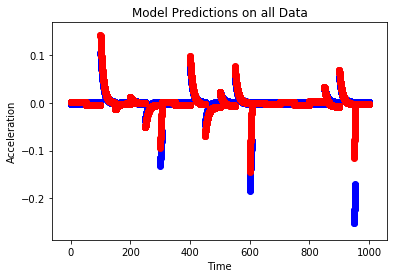

In [31]:
model = LinearRegression()


'''
First fit the model with the generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
(See the coef_ and intercept_ attributes in the LinearRegression
documentation)
'''

model.fit(all_inps, all_outs)
fit_score = model.score(all_inps, all_outs)
coefficients = model.coef_
intercept = model.intercept_ 

print(f"Model Fit {fit_score}")
print(f"Model Predictions:")
'''
Fill in the blanks in the next 4 lines with
reasonable names for the 4 coefficients and
in the curly braces put the corresponding
variable name to display it
'''
print(f"Acceleration: {ci.accel}")
print(f"Velocity: {ci.velocity}")
print(f"Accelerator Weight: {ci.accelerator_weight}")
print(f"Brake Weight: {ci.brake_weight}")
print("___________________________________________")

plt.clf()
plt.title("Model Predictions on all Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(all_times, all_outs, color = 'b')
plt.scatter(all_times, model.predict(all_inps), color = 'r')
plt.show()

Model Fit 0.9994423740901609
 c1: 0.10002752271596553
c2: -0.2497535345764811
c3: -0.10984722050448671
c4: 0.009964085197947484
___________________________________________


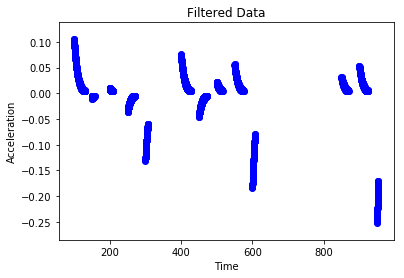

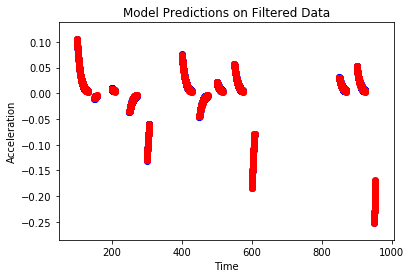

In [37]:
'''
First fit the model with the filtered generated data.
Then assign fit_score to sklearn LinearRegression
score function.  Finally retrieve the learned coefficients.
There should be 4, 3 linear dependencies and one constant.
Code should be similar to the previous section but now using
the filtered data.
'''

print(f"Model Fit {fit_score}")
'''
Fill in the blanks as in the previous section
'''
model.fit(filt_inps, filt_outs)
fit_score = model.score(filt_inps, filt_outs)
coefficients = model.coef_
intercept = model.intercept_ 
print(f" c1: {coefficients[0]}")
print(f"c2: {coefficients[1]}")
print(f"c3: {coefficients[2]}")
print(f"c4: {intercept}")


print("___________________________________________")

plt.clf()
plt.title("Filtered Data")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()

plt.clf()
plt.title("Model Predictions on Filtered Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(filt_times, filt_outs, color = 'b')
plt.scatter(filt_times, model.predict(filt_inps), color = 'r')
plt.show()
